In [71]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from ripser import ripser
from persim import plot_diagrams
import tadasets
from itertools import combinations
from scipy.interpolate import CubicSpline
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
#Functions used
def SW_cloud(f, tau, d, n_data):
    x_vals = f[0]
    y_vals = f[1]
    cs = CubicSpline(x_vals, y_vals)
    t_vals = np.linspace(np.min(x_vals), np.max(x_vals)-tau, n_data)
    SW = np.zeros((n_data, d+1))
    for i, t in enumerate(t_vals):
        SW_f_t = cs(t + np.arange(0, d+1) * tau)
        SW[i] = SW_f_t
    return SW

def RestrictedCocycle(cocycle1,cocycle2):
    New_cocycle1=[]
    edges=[]
    for i in range(len(cocycle1)):
            for j in range(len(cocycle2)):
                if np.array_equal(cocycle1[i:i-1, :2], cocycle1[i:i+1, :2], cocycle2[j:j+1, :2]):  
                    New_cocycle1.append(cocycle2[j:j+1])
            New_cocycle1.append(cocycle2[i:i+1])        
    rcocycle1=np.vstack(New_cocycle1)
    for i in range(len(cocycle1)):
            for j in range(len(cocycle2)):
                if np.array_equal(cocycle1[i-1:i, :2], cocycle2[j:j+1, :2]):
                    edges.append(cocycle2[j:j+1])        
    if len(edges)!=0:
        edges=np.vstack(edges)
    else:
        edges=edges
    for i in range(len(rcocycle1)):
        found_match = False
        for j in range(len(edges)):
            if np.array_equal(rcocycle1[i, :2], edges[j, :2]):
                found_match = True
                break
        if not found_match:
            rcocycle1[i, -1] = 0
    rcocycle=rcocycle1         
    return rcocycle


def cupProduct(phi, psi, triangleList): #Compute Cup Product
    cupProduct = []
    for i in range(len(triangleList)):
        phiVal = 0
        psiVal = 0
        for j in range(len(phi)):
            if phi[j][0] == triangleList[i][0] and phi[j][1] == triangleList[i][1]:
                phiVal = phi[j][2]
                break;
        for k in range(len(psi)):
            if psi[k][0] == triangleList[i][1] and psi[k][1] == triangleList[i][2]:
                psiVal = psi[k][2]
                break;
        cupProduct.append(phiVal * psiVal)
    cupProduct = np.array(cupProduct).T
    return cupProduct

def reductionAlgorithm(R):
    numRows = len(R[0])
    V = np.eye(numRows)
    pivotRows, pivotEntries = [[] for i in range (numRows)], [[] for i in range (numRows)]
    for i in range(numRows):
        h = 0
        while (h == 0):
            pivotRow = np.inf
            for j in range(numRows - 1, -1, -1):
                if R[j][i] != 0:
                    pivotRow = j
                    break;
            if pivotRow == np.inf:
                pivotEntries[i] = 0
            else:
                pivotEntries[i] = R[pivotRow][i]
            pivotRows[i] = pivotRow
            if pivotRow == np.inf or all(pivotRows[k] != pivotRows[i] for k in range(i)):
                h = 1
                break;
            for k in range(i):
                if pivotRows[k] == pivotRows[i]:
                    c = pivotEntries[i] // pivotEntries[k]
                    for l in range(numRows):
                        R[l][i] -= c * R[l][k]
                        V[l][i] -= c * V[l][k]            
    return R

def checkSolution(A, b):
    # Calculate the rank of the augmented matrix [A | b]
    augmented_matrix = np.column_stack((A, b))
    rank_A = np.linalg.matrix_rank(A)
    rank_augmented = np.linalg.matrix_rank(augmented_matrix)
    num_columns = A.shape[1]
    num_rows = A.shape[0]
    if rank_A == rank_augmented:
        if rank_A == num_columns:
            return 1
        elif rank_A < num_columns:
            return 1
    else:
        if rank_A < rank_augmented:
            return 0
    return "Unable to determine the solution status."

def rowDetect(A, b):
    iMax = len(A) + 1
    iMin = 1
    i = len(A) // 2
    running = True
    while(running):
        sol = checkSolution(A[-i:], b[-i:])
        if sol == 0:
            if checkSolution(A[-(i - 1):], b[-(i - 1):]) == 1:
                row = len(A) - i
                running = False
                break;
            else:
                if i < iMax:
                    iMax = i
                    i = (iMax + iMin) // 2
        if sol == 1:
            if i > iMin:
                iMin = i
                i = (iMax + iMin) // 2
            if i==len(A):
                row=-1
                running=False
                break;
    return row+1

def rowTriangle(r):
    value=len(triangles)-1-r
    return triangles[value]

def Score(birth,death):
    score=abs(birth-death)
    return score

         Date      Open      High       Low     Close
0  07/07/2023  4,404.54  4,440.39  4,397.40  4,398.95
1  07/06/2023  4,422.62  4,422.62  4,385.05  4,411.59
2  07/05/2023  4,442.04  4,454.06  4,436.61  4,446.82
3  07/03/2023  4,449.45  4,456.46  4,442.29  4,455.59
4  06/30/2023  4,422.44  4,458.48  4,422.44  4,450.38


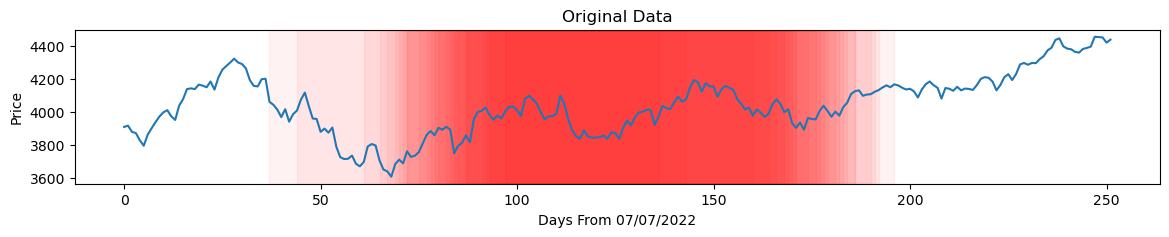

/var/folders/pm/f96dm5b14t3fmcwysg1kb5g00000gn/T/ipykernel_52557/834692135.py:183: RuntimeWarning: invalid value encountered in divide
  normalized_scores = (np.array(quasiperiodic_scores) - np.min(quasiperiodic_scores)) / (np.max(quasiperiodic_scores) - np.min(quasiperiodic_scores))
/var/folders/pm/f96dm5b14t3fmcwysg1kb5g00000gn/T/ipykernel_52557/834692135.py:186: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis')


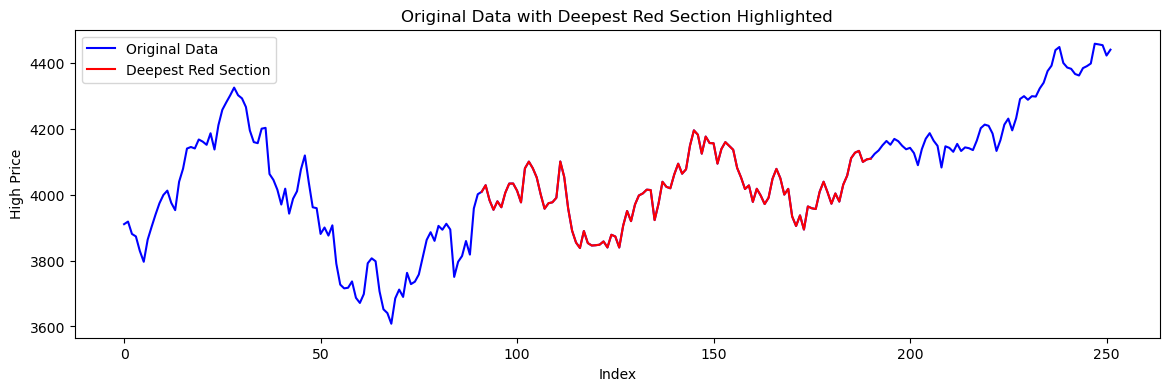

[[  91.   4008.97]
 [  92.   4028.84]
 [  93.   3983.09]
 [  94.   3954.33]
 [  95.   3979.89]
 [  96.   3962.  ]
 [  97.   4005.88]
 [  98.   4033.78]
 [  99.   4034.02]
 [ 100.   4012.27]
 [ 101.   3976.77]
 [ 102.   4080.11]
 [ 103.   4100.51]
 [ 104.   4080.48]
 [ 105.   4052.45]
 [ 106.   4001.51]
 [ 107.   3957.57]
 [ 108.   3974.19]
 [ 109.   3977.02]
 [ 110.   3990.71]
 [ 111.   4100.96]
 [ 112.   4053.76]
 [ 113.   3958.37]
 [ 114.   3890.91]
 [ 115.   3854.86]
 [ 116.   3838.24]
 [ 117.   3889.82]
 [ 118.   3853.26]
 [ 119.   3845.8 ]
 [ 120.   3846.65]
 [ 121.   3848.32]
 [ 122.   3858.19]
 [ 123.   3839.85]
 [ 124.   3878.46]
 [ 125.   3873.16]
 [ 126.   3839.74]
 [ 127.   3906.19]
 [ 128.   3950.57]
 [ 129.   3919.83]
 [ 130.   3970.07]
 [ 131.   3997.76]
 [ 132.   4003.95]
 [ 133.   4015.39]
 [ 134.   4014.16]
 [ 135.   3922.94]
 [ 136.   3972.96]
 [ 137.   4039.31]
 [ 138.   4023.92]
 [ 139.   4019.55]
 [ 140.   4061.57]
 [ 141.   4094.21]
 [ 142.   4063.85]
 [ 143.   40

In [81]:
#S&P
import pandas as pd
data=pd.read_csv('Download Data - INDEX_US_S&P US_SPX.csv')
data.head()
print(data.head())
data=data['High']
data = [float(element.replace(',', '')) for element in data] 
data=np.array(data)
data=data[::-1]
x_vals = list(range(len(data)))
y_vals=data[x_vals]
f = np.array([x_vals, y_vals]) 
d = 4
tau = 1.5

quasiperiodic_regions=[]
quasiperiodic_scores=[]
# Define sliding window parameters
window_size = 100  # Set the window size
step_size = 5     # Set the step size (can be adjusted based on your needs)

# Iterate with sliding windows
for i in range(0, len(y_vals) - window_size  + 1, step_size):
    # Adjust the starting and ending indices to ensure coverage of the entire dataset
    start_index = max(0, i)
    end_index = min(i + window_size, len(y_vals))
    window = y_vals[start_index:end_index]
    n_data = window_size
    # Create the f array for the current window
    f_window = np.array([x_vals[i : i + window_size], window])
    SW = SW_cloud(f_window, tau, d, n_data)
    x=SW
    #Part 1: Get the Cup Product
    result = ripser(x, coeff=2, do_cocycles=True)
    diagrams = result['dgms']
    cocycles = result['cocycles'] #all of the cocycles
    D = result['dperm2all'] #distance matrix between the ith and jth points in the data
    dgm1 = diagrams[1]
    #Representative cocycle phi
    idx1 = np.argmax(dgm1[:, 1] - dgm1[:, 0])
    cocycle1 = cocycles[1][idx1]
    #Representative cocycle psi
    sorted_indices = np.argsort(dgm1[:, 1] - dgm1[:, 0])
    idx2 = sorted_indices[-2]
    cocycle2 = cocycles[1][idx2]
    rcocycle=RestrictedCocycle(cocycle1,cocycle2)
    representative_cocycles = []
    for i in range(len(dgm1)):
        birth, death = dgm1[i]
        if birth != death:  # ignore points on the diagonal
            cocycle = cocycles[1][i]
            representative_cocycles.append(cocycle)
    triangles = []
    for cocycle in representative_cocycles:
        edge_indices = cocycle[:, :2].astype(int)
        triangle_vertices = set()
        for i, j in edge_indices:
            triangle_vertices.add(i)
            triangle_vertices.add(j)
        triangle_combinations = combinations(triangle_vertices, 3)
        for combination in triangle_combinations:
            triangles.append(list(combination))
    t=np.vstack(triangles)
    if len(cocycle1) >= len(cocycle2):
        cup=cupProduct(rcocycle,cocycle2, t)#Compute the cup Product
    else:
        cup=cupProduct(rcocycle,cocycle1, t)
    cup=np.vstack(cup)
    edges = []
    vertices=[]
    representative_cocycles = []
    for i in range(len(dgm1)):
        birth, death = dgm1[i]
        if birth != death:  
            cocycle = cocycles[1][i]
            representative_cocycles.append(cocycle)
    for cocycle in representative_cocycles: # Extracting every edge as an array of vertices
        edge_indices = cocycle[:, :2].astype(int)
        for i, j in edge_indices:
            edge = [i, j]
            edges.append(edge)
    for cocycle in representative_cocycles: #Extracting every vertex
        vertex_indices = cocycle[:, :1].astype(int)
        for i in vertex_indices:
            vertices.append(i[0])
    vertices = list(set(vertices)) # Remove duplicate vertices by converting the list to a set and then back to a list
    ne = len(edges)
    nt = len(triangles)
    nv = len(vertices)
    num_rows= ne+nt+nv
    num_cols=ne+nt+nv
    boundary_matrix=np.zeros((num_rows, num_cols), dtype=int)
    for i,edge in enumerate(edges):
        a,b=edge #a and b are the two verticies that make up the edge
        for j,vertex in enumerate(vertices):
            c=vertex # c is a vertex
            if b == c:
                boundary_matrix[nv+i,j]=1
            if a == c:
                boundary_matrix[nv+i,j]=-1
    for i, triangle in enumerate(triangles):
        e,f,g=triangle #e,f,g are verticies in the triangle
        for j,edge in enumerate(edges):
            h,k=edge 
            if (h,k) == (e,f):
                boundary_matrix[(ne+nv)+i,nv+j]=1
            if (h,k) == (f,g):
                boundary_matrix[(ne+nv)+i,nv+j]=1
            if (h,k) == (e,g):
                boundary_matrix[(ne+nv)+i,nv+j]=-1
    boundary_matrix=boundary_matrix.T
#Convert Boundary Matrix into Coboundary
    restricted_matrix = boundary_matrix[nv:nv + ne, nv + ne:len(boundary_matrix)]
    coboundary_matrix = np.flip(restricted_matrix).T
    reduce=reductionAlgorithm(coboundary_matrix)
    detect=rowDetect(reduce, cup)
    tri=rowTriangle(detect)
    sorted_indices = np.argsort(dgm1[:, 1] - dgm1[:, 0])
    idx2 = sorted_indices[-2]
    h = max(dgm1[idx1, 0], dgm1[idx2, 0])
    while h < min(dgm1[idx1, 1], dgm1[idx2, 1])+100000:
        newRun = ripser(x, coeff=2, thresh = h, do_cocycles = True)
        newDiagrams = newRun['dgms']
        newCocycles = newRun['cocycles']
        D = newRun['dperm2all']
        dgmNew = newDiagrams[1]
        new_representative_cocycles = []
        for i in range(len(dgmNew)):
            birth, death = dgmNew[i]
            if birth != death:  # ignore points on the diagonal
                newCocycle = newCocycles[1][i]
                new_representative_cocycles.append(newCocycle)
        newTriangles = []
        for newCocycle in new_representative_cocycles:
            edge_indices = newCocycle[:, :2].astype(int)
            new_triangle_vertices = set()
            for i, j in edge_indices:
                new_triangle_vertices.add(i)
                new_triangle_vertices.add(j)
            new_triangle_combinations = combinations(new_triangle_vertices, 3)
            for combination in new_triangle_combinations:
                newTriangles.append(list(combination))
        if len(newTriangles) !=0:
             t=np.vstack(newTriangles)
        for k in range(len(t)):
            if t[k][0] == tri[0] and t[k][1] == tri[1] and t[k][2] == tri[2]:
                death=h #Gives the Cohomological death 
                h = 1000000
                break;
        h += 0.01
#Part 4: Plot the persistence diagram with the new point
    birth=dgm1[idx2,1] #death of psi but birth of H2 point 
    phiBirth = dgm1[idx1, 0]
    psiBirth = dgm1[idx2, 0]
    phiDeath = dgm1[idx1, 1]
    psiDeath = dgm1[idx2, 1]
    QPDS = (birth - death) / min(phiDeath - phiBirth, psiDeath - psiBirth)
    #print(f"Quasiperiodicity Score: " + str(QPDS * 100) + "%")
    
    if QPDS>0.98:
        quasiperiodic_regions.append((i, i + window_size - 1))
        quasiperiodic_scores.append(QPDS)

date=pd.read_csv('Download Data - INDEX_US_S&P US_SPX.csv')
date=date[::-1]
date=date['Date']

# Plot the original data
plt.figure(figsize=(14, 2))
plt.plot(x_vals, y_vals)
plt.xlabel(f'Days From {date[len(date)-1]}')
plt.ylabel('Price')
plt.title('Original Data')
        
# Plot the identified quasiperiodic regions
for region in quasiperiodic_regions:
    plt.axvspan(region[0], region[1], color='red', alpha=0.05)

plt.show()

#From above, I would like to see the section that is most quasaiperiodic

normalized_scores = (np.array(quasiperiodic_scores) - np.min(quasiperiodic_scores)) / (np.max(quasiperiodic_scores) - np.min(quasiperiodic_scores))

# Define the colormap for the colors of the regions
cmap = get_cmap('viridis')
# Find the section with the deepest red shading
max_score_index = np.argmax(normalized_scores)
deepest_red_region = quasiperiodic_regions[max_score_index]

# Extract the data points of the section
start_index, end_index = deepest_red_region
section_data = y_vals[start_index : end_index+1]
section_x_vals = x_vals[start_index : end_index+1]

# Plot the original data with the section highlighted
plt.figure(figsize=(14, 4))
plt.plot(x_vals, y_vals, color='blue', label='Original Data')
plt.plot(x_vals[start_index : end_index+1], section_data, color='red', label='Deepest Red Section')
plt.xlabel('Index')
plt.ylabel('High Price')
plt.title('Deepest Red Section Highlighted')
plt.legend()
plt.show()

y_section=np.array(section_data)
x_section=np.array(section_x_vals)
section_array=np.vstack((x_section,y_section)).T
print(section_array)



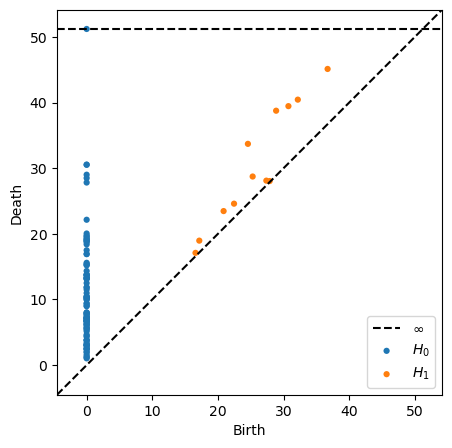

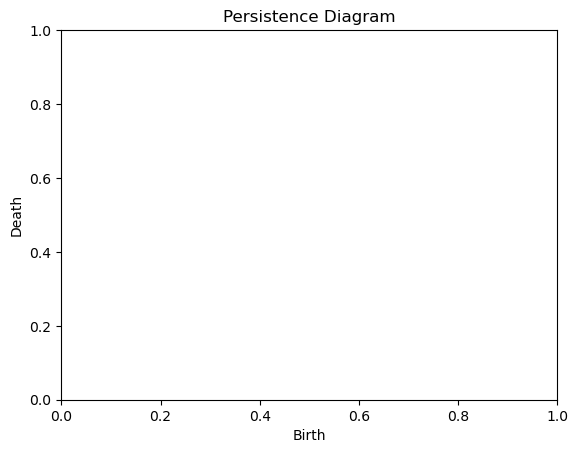

In [83]:
#confirm torus

result = ripser(section_array, coeff=2, do_cocycles=True)
diagrams = result['dgms']

# Plot the persistence diagram
plt.figure(figsize=(5, 5))
plot_diagrams(diagrams, show=True)
plt.title('Persistence Diagram')
plt.xlabel('Birth')
plt.ylabel('Death')
plt.show()

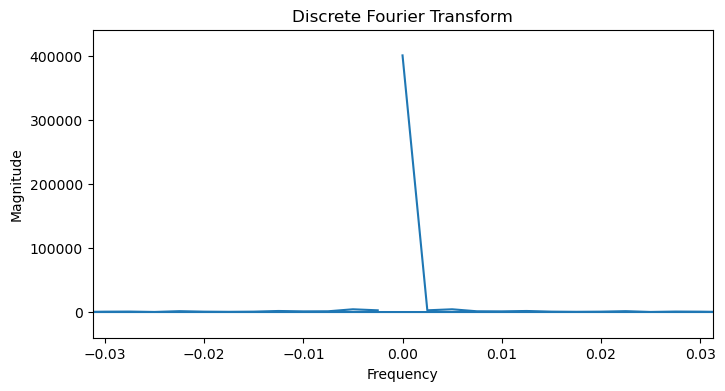

In [82]:
d=4
# Perform DFT on the data
dft = np.fft.fft(y_section)
# Compute the frequencies
sampling_rate = 1
n = len(dft)
freqs = np.fft.fftfreq(n, d/sampling_rate)
# Plot the DFT
plt.figure(figsize=(8, 4))
plt.plot(freqs, np.abs(dft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Discrete Fourier Transform')
plt.xlim(-sampling_rate/32, sampling_rate/32)  
# Set y-axis limits for a specific range
y_min = np.min(np.abs(dft))  #Minimum value of the magnitude
y_max = np.max(np.abs(dft))  #Maximum value of the magnitude
y_margin = 0.1 * (y_max - y_min)  #Margin to add some padding
plt.ylim(y_min - y_margin, y_max + y_margin)
plt.show()

In [ ]:
#Statistical Analysis
from scipy.stats import kurtosis


#Mean
mean=np.mean(y_section)

#Standard Deviation
SD=np.std(section_array)

#Max/Min
mx=np.max(y_section)
mn=np.min(y_section)

#kurtosis

k=kurtosis(section_


    